In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
                   Accuracy  Precision    Recall  F1 Score
Árvore de Decisão   1.00000   1.000000  1.000000  1.000000
KNN                 0.75974   0.655172  0.690909  0.672566
Random Forest       1.00000   1.000000  1.000000  1.000000


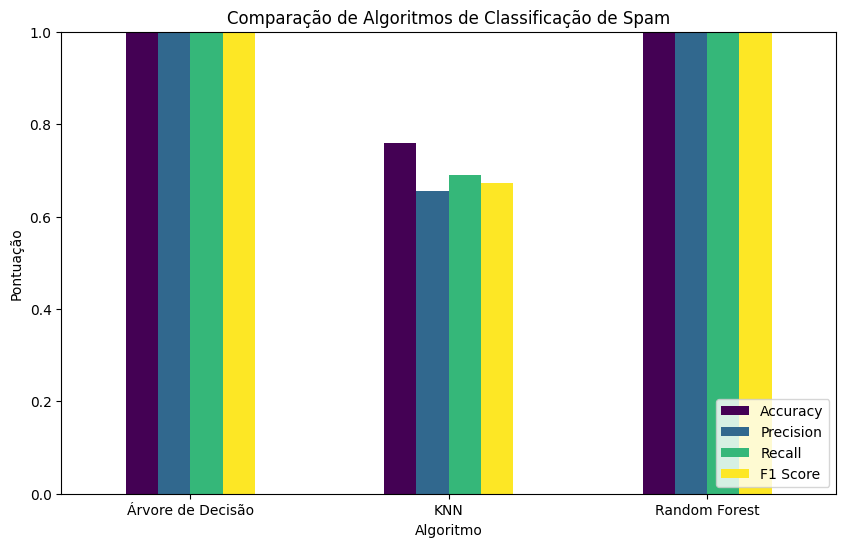

                                                    Accuracy  Precision  \
n_estimators=50,\n max_depth=10,\n min_samples_...       1.0        1.0   
n_estimators=100,\n max_depth=20,\n min_samples...       1.0        1.0   
n_estimators=200,\n max_depth=30,\n min_samples...       1.0        1.0   
n_estimators=100,\n max_depth=None,\n min_sampl...       1.0        1.0   

                                                    Recall  F1 Score  
n_estimators=50,\n max_depth=10,\n min_samples_...     1.0       1.0  
n_estimators=100,\n max_depth=20,\n min_samples...     1.0       1.0  
n_estimators=200,\n max_depth=30,\n min_samples...     1.0       1.0  
n_estimators=100,\n max_depth=None,\n min_sampl...     1.0       1.0  


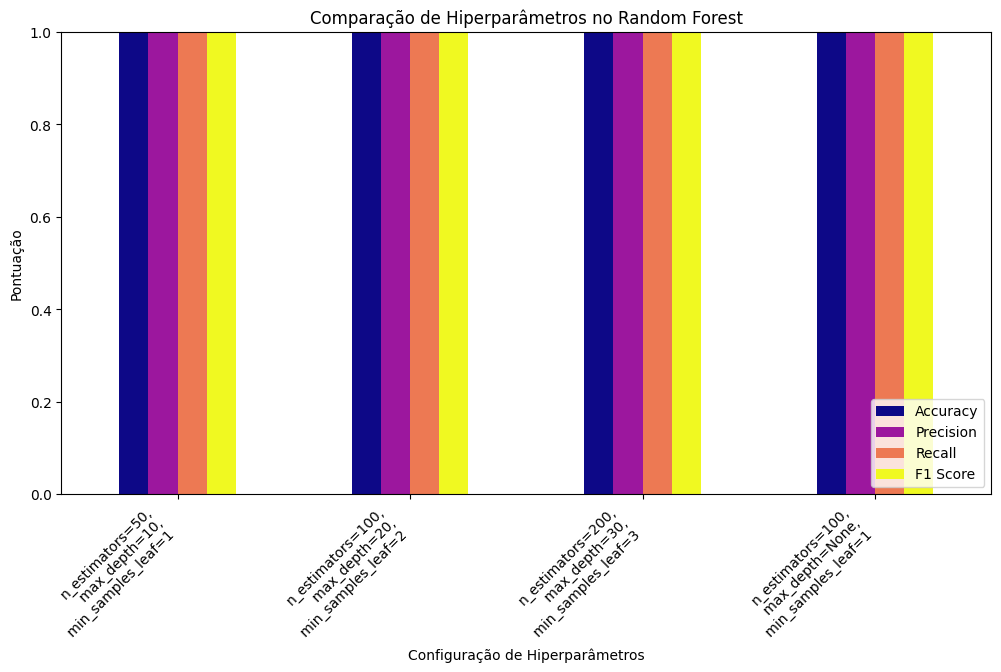

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

file_path = path + "/diabetes.csv"
df = pd.read_csv(file_path)
data = df.values
feature_names = df.columns

df['target'] = df['Outcome']
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

estimator = RandomForestClassifier()
selector = RFE(estimator, step=1, verbose=1)

selector = selector.fit(x_train, y_train)
selector.support_

x_train = x_train[x_train.columns[selector.support_]]
x_test = x_test[x_test.columns[selector.support_]]

# Avaliação dos modelos
def avaliar_modelos(modelo, x_train, y_train, x_test, y_test):
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    }

modelos = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
}

resultados_modelos = {nome: avaliar_modelos(modelo, x_train, y_train, x_test, y_test)
                      for nome, modelo in modelos.items()}

df_resultados = pd.DataFrame(resultados_modelos).T
print(df_resultados)

df_resultados.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='viridis')
plt.title("Comparação de Algoritmos de Classificação de Diabetes")
plt.xlabel("Algoritmo")
plt.ylabel("Pontuação")
plt.legend(loc="lower right")
plt.xticks(rotation=0)
plt.show()

# Comparação de hiperparâmetros no Random Forest
hiperparametros_rf = [
    {"n_estimators": 50, "max_depth": 10, "min_samples_leaf": 1},
    {"n_estimators": 100, "max_depth": 20, "min_samples_leaf": 2},
    {"n_estimators": 200, "max_depth": 30, "min_samples_leaf": 3},
    {"n_estimators": 100, "max_depth": None, "min_samples_leaf": 1},
]

resultados_rf = {
    f"n_estimators={p['n_estimators']},\n max_depth={p['max_depth']},\n min_samples_leaf={p['min_samples_leaf']}":
    avaliar_modelos(
        RandomForestClassifier(
            n_estimators=p['n_estimators'], max_depth=p['max_depth'],
            min_samples_leaf=p['min_samples_leaf'], random_state=42
        ),
        x_train, y_train, x_test, y_test
    )
    for p in hiperparametros_rf
}

df_resultados_rf = pd.DataFrame(resultados_rf).T
print(df_resultados_rf)

df_resultados_rf.plot(kind='bar', figsize=(12, 6), ylim=(0, 1), colormap='plasma')
plt.title("Comparação de Hiperparâmetros no Random Forest")
plt.xlabel("Configuração de Hiperparâmetros")
plt.ylabel("Pontuação")
plt.legend(loc="lower right")
plt.xticks(rotation=45, ha="right")
plt.show()